## Customer churn: Data Science study   

Lets understand the four types of churn:
Tariff plan churn: from 300 to 200 rs offers
Service churn: (Weekely/monthly subscriptions)
Product churn:postpaid to prepaid
Usage churn:inactive to zero



In [ ]:
1.Problem statement

2.Data source( Web scrapping ( own data))

3.EDA

4.model

1.Lets understand the ratio of churn(YES?NO) ratio

2.There are certain categorical variables and numerical
3.Lets do the univariate analysis(1 x variable and 1 y variable of gender,senior citizen,partner column)


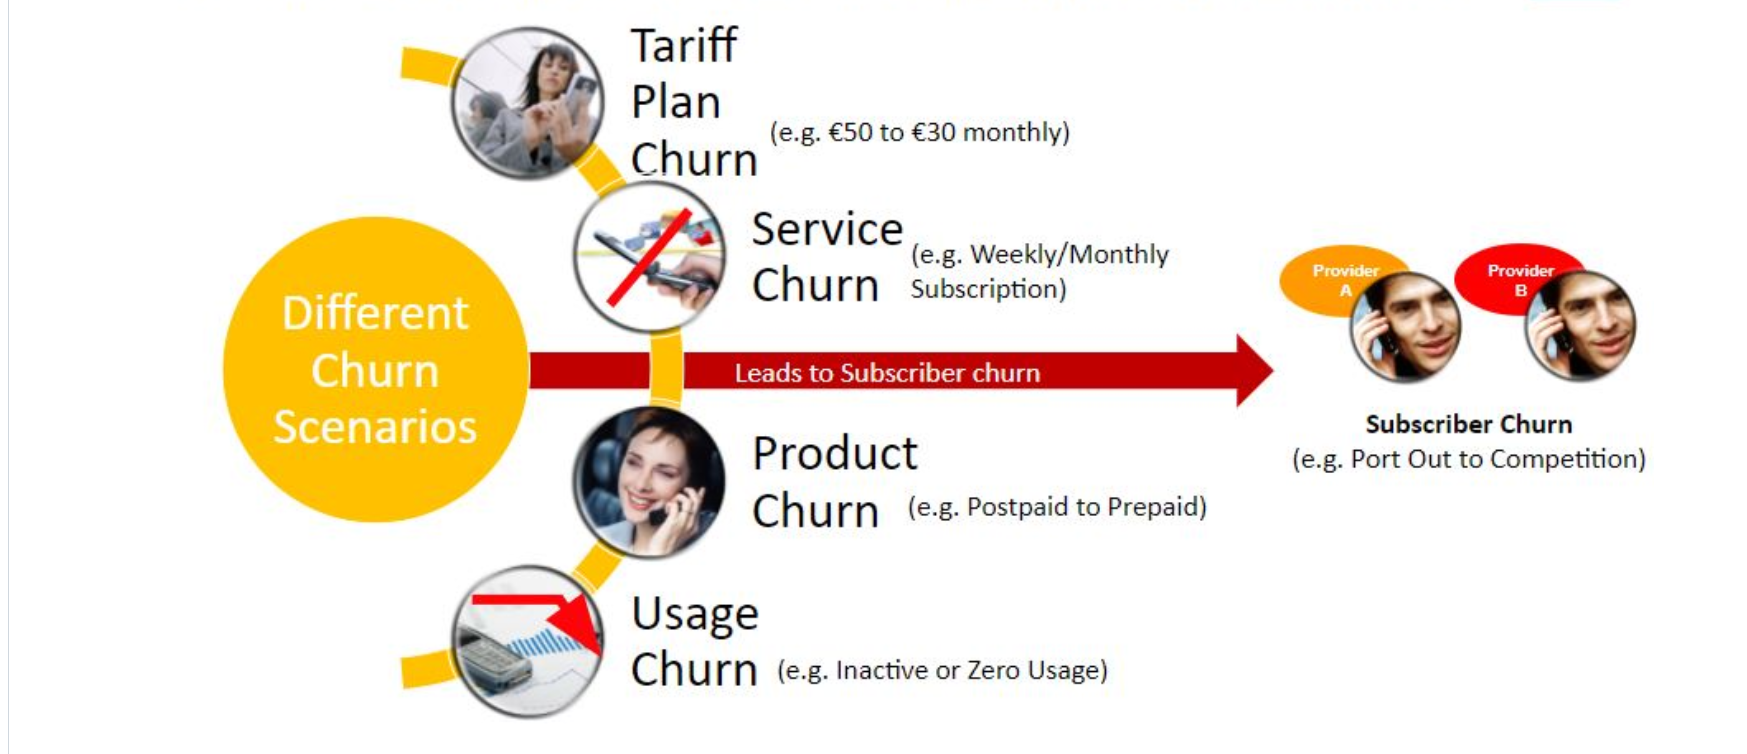

EDA

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
tele = pd.read_csv("tele.csv")

In [82]:
tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# check the shape( rows and columns)
tele.shape

(7043, 21)

In [18]:
tele.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
#checking the datatypes of all the columns
tele.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [78]:
# descriptive statistics of numerical variables ( if u want to see for the categorical variabes,
#then conver thrm into int or float)
tele.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
#senior citizen is actually categorical and hence25%,50% and 75%  distribution  is not proper
# 75% customers have tenure less than 55 months
#average monthly chargees are  usd 64.76% and 25% customers pay more than usd 89.85 per month

In [19]:
tele['Churn'].value_counts()
# if we need  % of churners and non churners then , 
#100 * tele['Churn'].value_counts()/len(tele['Churn'])

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
100 * tele['Churn'].value_counts()/len(tele['Churn'])
#  non churners are 73% and 26% churners

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

#data is highly imbalanced, ratio = 73:27,(50:50,45:50 is called balanced data) so lets analyse  the data with  other features while
#taking the  target values separaetely  to get some insights


#what is imbalanced data?
 accuracy is cursed,might work well in trainng  but in test data , it fails( overfitting)
  There are 2 techniques to deal with imbalanced data :
    
Upsampling and low sampling
upsampling means creating the synthatic records for low class,here non churners have less data,so inducing data(copy the data 
points nad paste ,to match the high data points. Rename few features )

Downsampling :reducing the data points from high dataset , so as to match the low data set.

Normally upsamplimg gives better results , because it has more data points compared to lower data set

Always perform the undersampling , only when datas set is huge



Text(0.5, 1.02, 'Count of target variable per category')

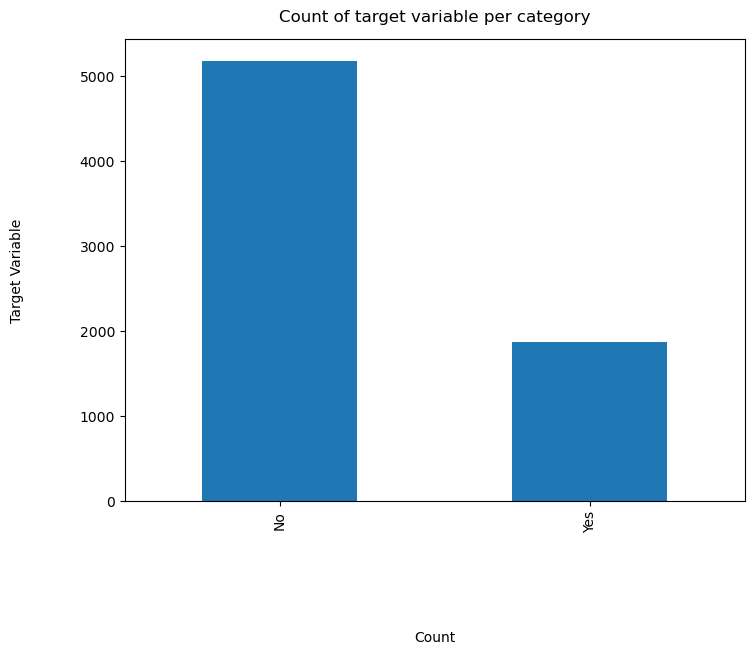

In [101]:
# Make a horizontal bar plot. A horizontal bar plot is a 
#plot that presents quantitative data with rectangular bars with lengths 
#proportional to the values that they represent

# labelpad is a distance in points from the axes bounding box including ticks and tick labels.
tele['Churn'].value_counts().plot(kind = 'bar',figsize =(8,6))
plt.xlabel("Count",labelpad = 70)
plt.ylabel("Target Variable",labelpad =40)
plt.title("Count of target variable per category", y= 1.02)

 handling the missing data:

 Less missing values :you can use regression to predict the missing values or fill with the mean of a value
    
For columns with more missing values : you can drop these featutes , as they give less insights


In [102]:
# converting the column "TOTAL CHARGES" from object into int or float.
# total charges should be a numerical data , so converting it 
# first create a copy of data and store it in a  variable

In [104]:
tele_data = tele.copy()

In [110]:
tele_data.TotalCharges = pd.to_numeric(tele_data.TotalCharges,errors = 'coerce')

In [111]:
#tele_data.isnull().sum()

In [112]:
# total charges feature has 11 missing values 
#tele_data.loc[tele_data['TotalCharges'].isnull()== True]

In [114]:
#tele_data.dtypes

In [115]:
tele_data.shape

(7043, 21)

In [116]:
# out of 7043 records only 11 missing values,which is 0.15% missing values, so its safe to drop 
#the coulumns
# fillna() : this function fills the empty row(null values) into  0 
tele_data.dropna(how = 'any',inplace = True)


In [121]:
#tele_data.shape

In [122]:
#tele_data['tenure'].describe()

In [37]:
#tele_data['tenure']

In [118]:
# group the tenure  in bins of 12 months
labels = ["{0} -{1}".format(i,i+11) for i in range(1,72,12)]

tele_data['tenure-group'] = pd.cut(tele_data.tenure,range(1,80,12),right = False,labels = labels)



In [123]:
#tele_data['tenure-group'].value_counts()

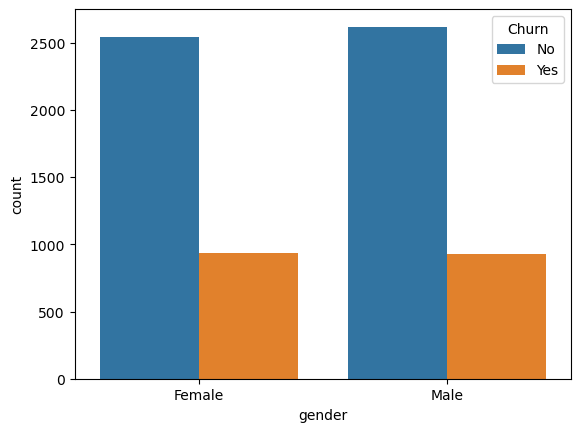

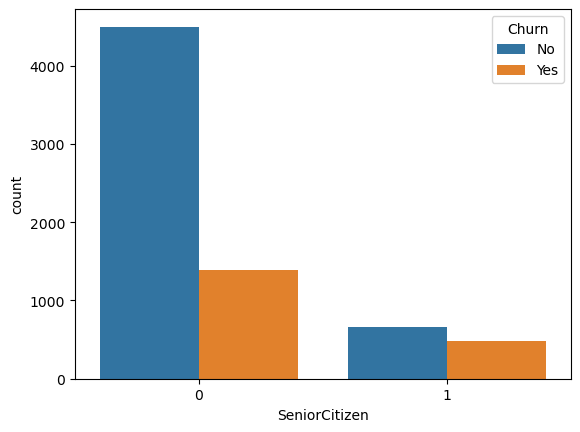

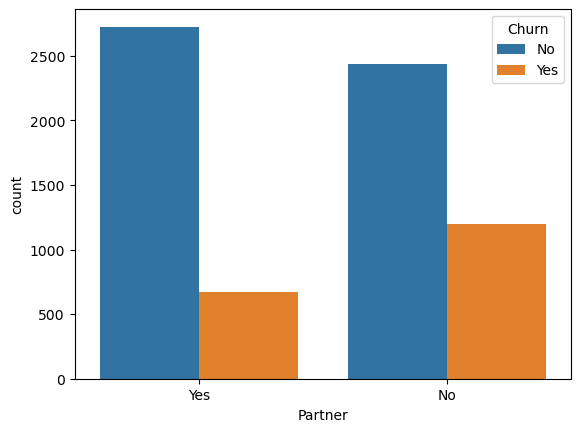

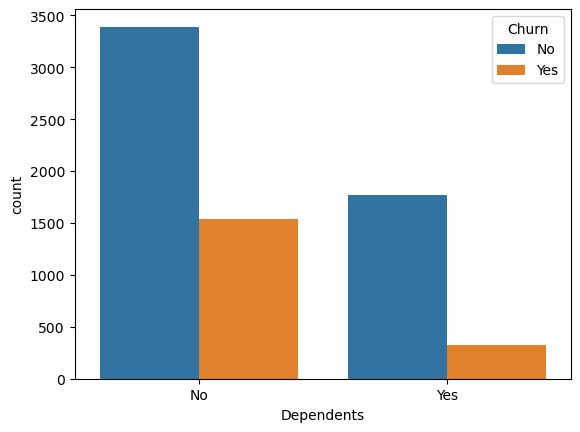

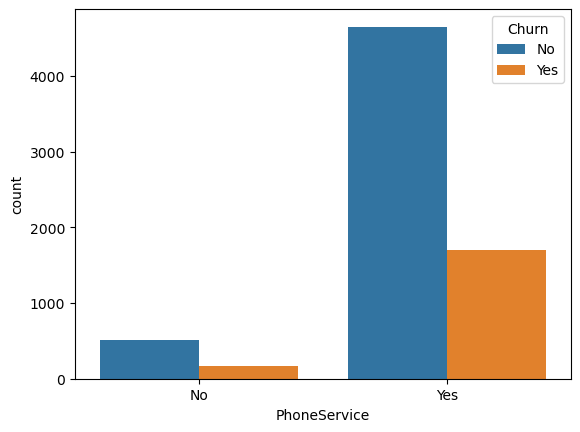

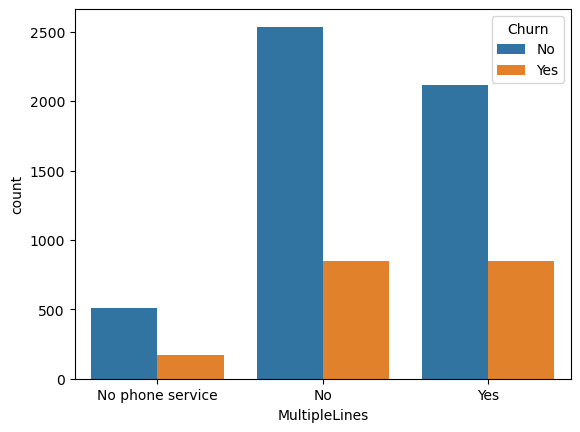

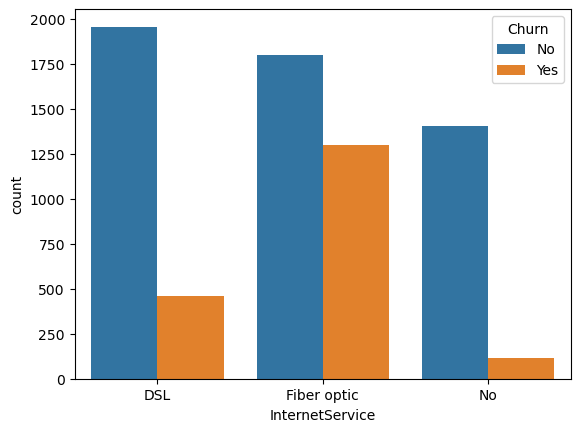

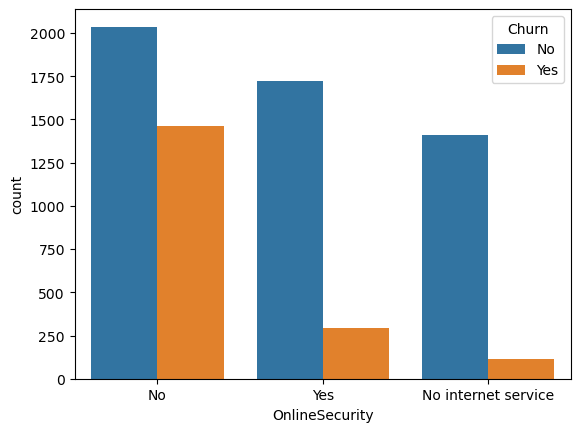

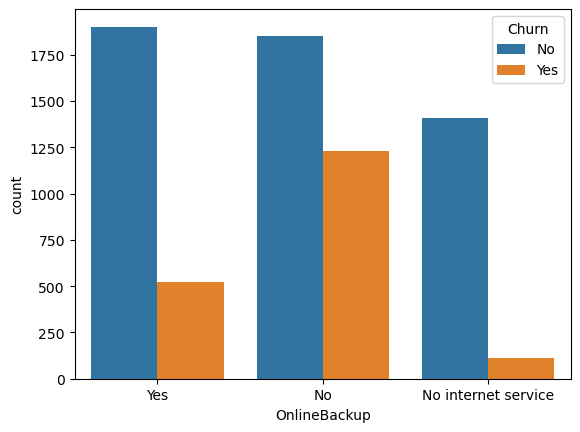

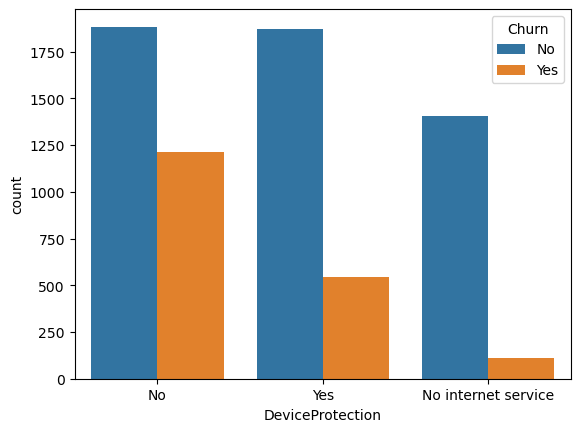

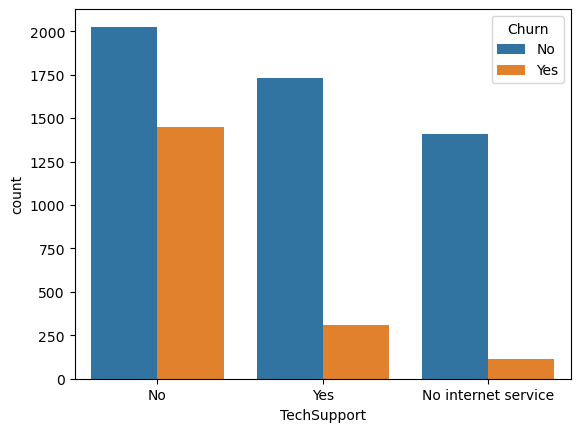

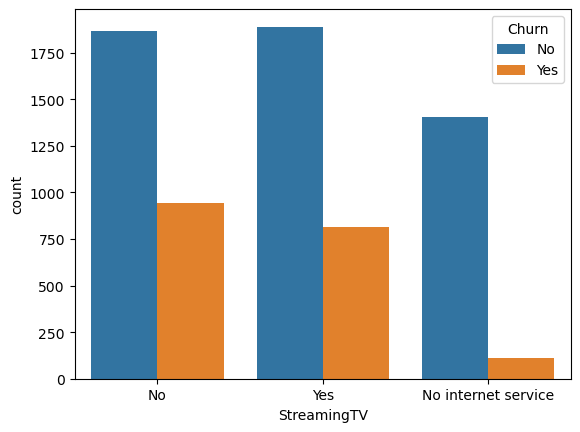

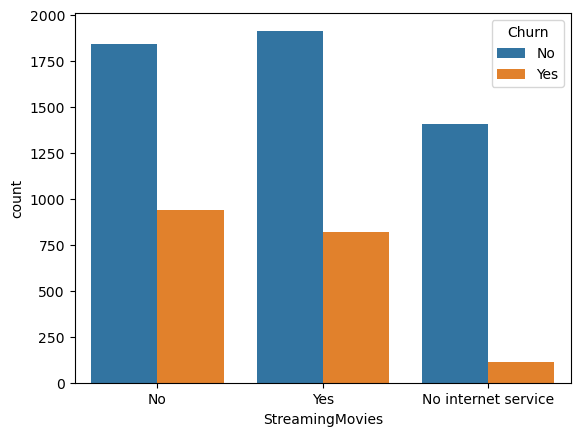

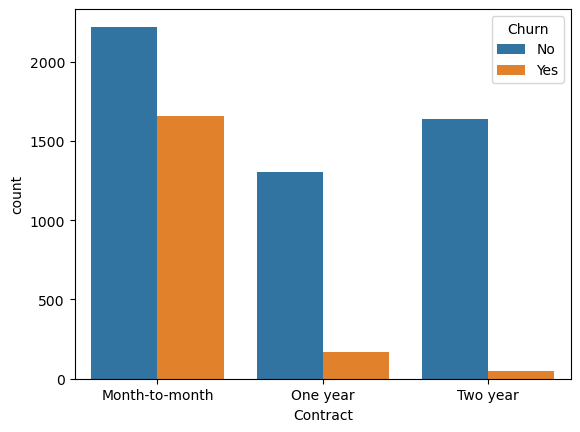

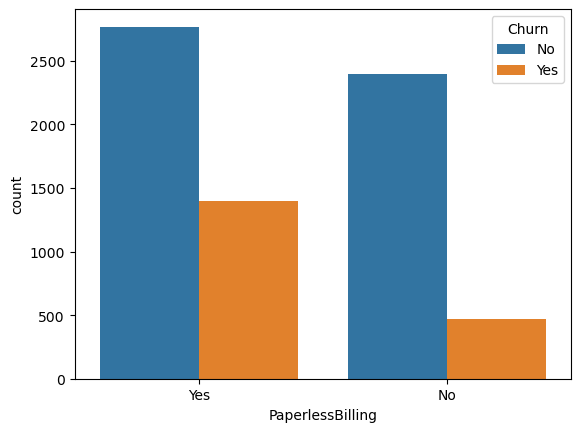

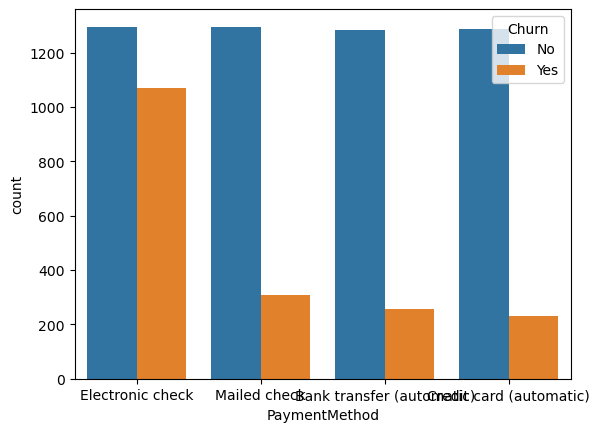

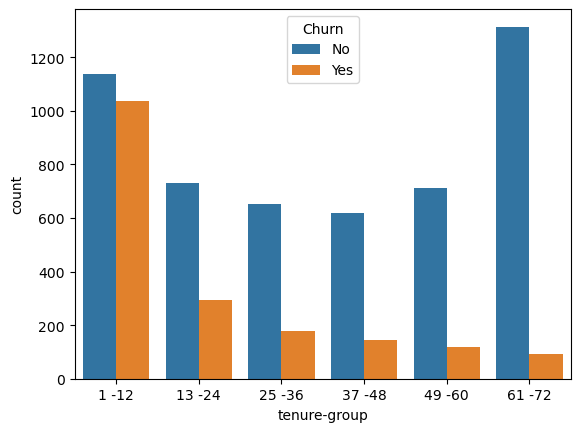

In [36]:
# Data exploration:plot distributions of individual predictors by churn
# univariate analysis
for i,predictor in  enumerate(tele_data.drop(columns = ['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = tele_data,x = predictor,hue = 'Churn')
    



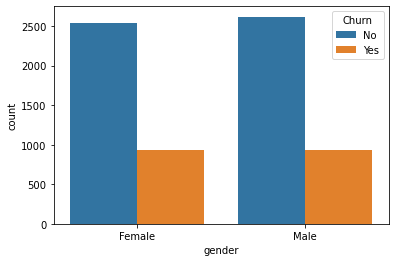

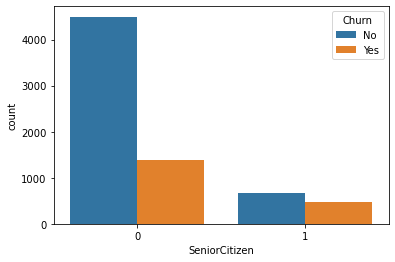

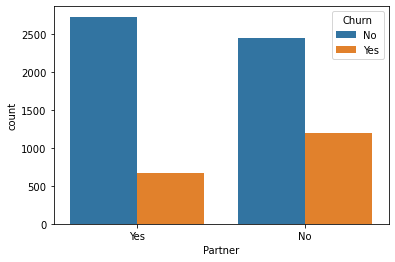

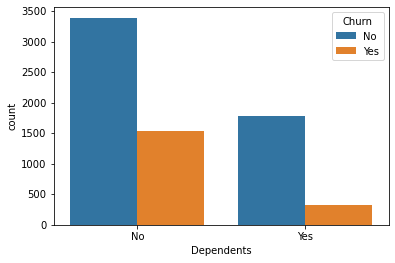

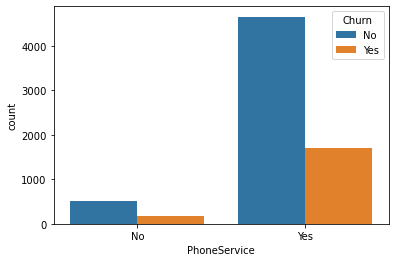

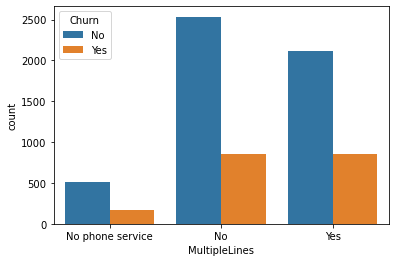

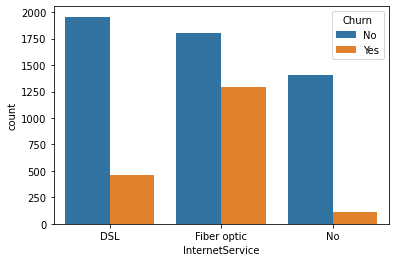

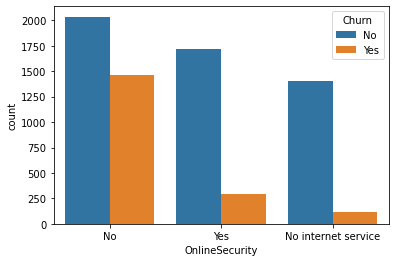

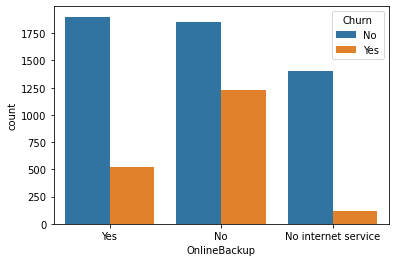

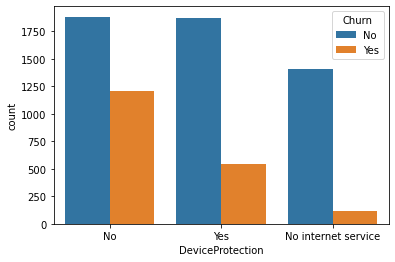

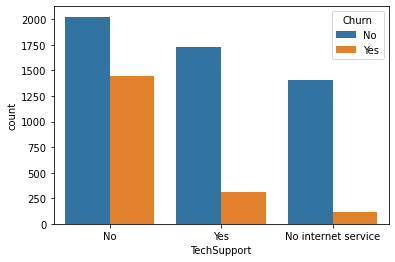

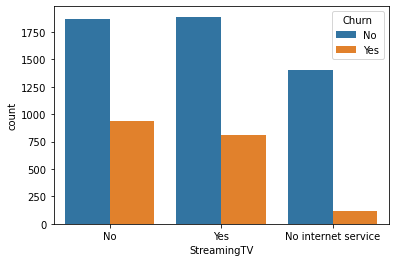

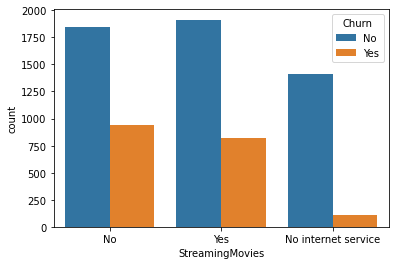

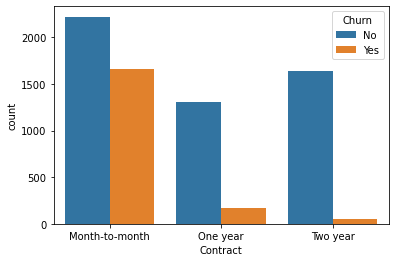

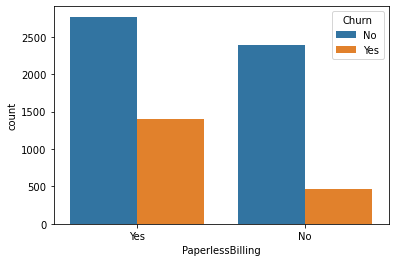

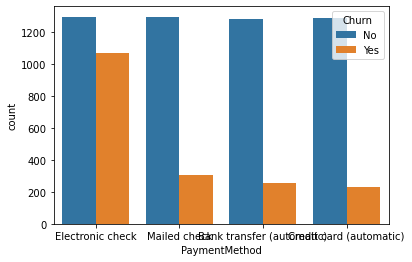

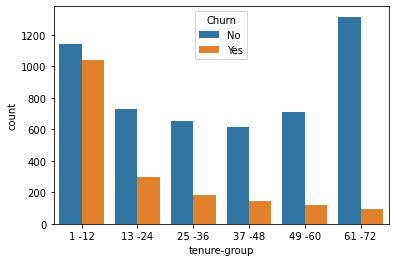

In [24]:
for i,predictor in enumerate(tele_data.drop(columns = ['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = tele_data, x= predictor,hue = 'Churn')
# for i,predictor in enumerate(tele_data.drop(columns = ['Churn','TotalCharges','MonthlyCharges'])):

In [124]:
# convert  all the  categorical variables into dummy variables:

tele_data_dummies = pd.get_dummies(tele_data)
tele_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure-group_1 -12,tenure-group_13 -24,tenure-group_25 -36,tenure-group_37 -48,tenure-group_49 -60,tenure-group_61 -72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0


In [33]:
# lets try to understand the relationship between the monthly charges and the  total charges


In [137]:
# insight we got : total charges increase as monthlycharge increase,
tele_data['Churn'] = np.where(tele_data.Churn=='Yes',1,0)

In [138]:
tele_data_dummies = pd.get_dummies(tele_data)


C:\Users\Shilpa\AppData\Local\Temp\ipykernel_16108\4175083270.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(tele_data_dummies.MonthlyCharges[(tele_data_dummies["Churn"] == 0)],


Text(0.5, 1.0, 'Monthly charges by churn')

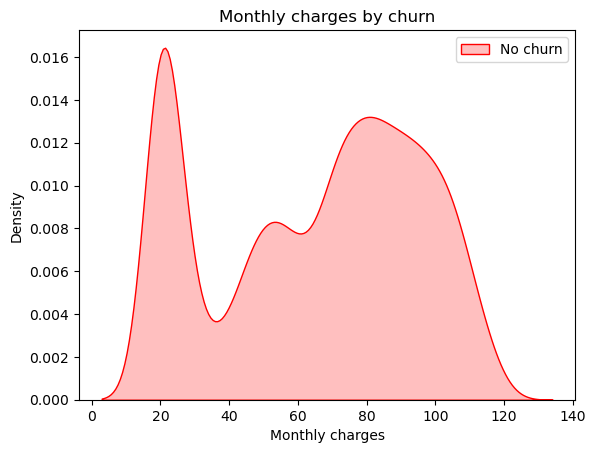

In [134]:
mth = sns.kdeplot(tele_data_dummies.MonthlyCharges[(tele_data_dummies["Churn"] == 0)],
                 color = "Red",shade = True)
mth = sns.kdeplot(tele_data_dummies.MonthlyCharges[(tele_data_dummies["Churn"] == 1)],
                 ax = mth,color = "Blue")
mth.legend(["No churn","Churn"], loc = "upper right")
mth.set_ylabel("Density")
mth.set_xlabel("Monthly charges")
mth.set_title("Monthly charges by churn")


C:\Users\Shilpa\AppData\Local\Temp\ipykernel_16108\4083060771.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(tele_data_dummies.TotalCharges[(tele_data_dummies['Churn'] == 0)],
C:\Users\Shilpa\AppData\Local\Temp\ipykernel_16108\4083060771.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(tele_data_dummies.TotalCharges[(tele_data_dummies["Churn"] == 1)],


Text(0.5, 1.0, 'Total charges by churn')

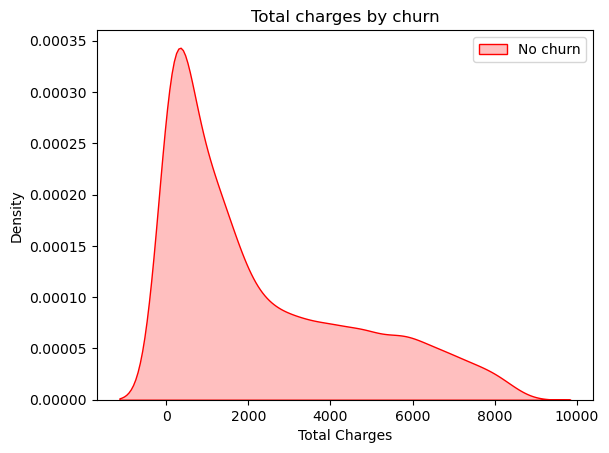

In [135]:
# churn is  high when monthly charges are high
tot = sns.kdeplot(tele_data_dummies.TotalCharges[(tele_data_dummies['Churn'] == 0)],
                 color = "Red", shade = True)
tot = sns.kdeplot(tele_data_dummies.TotalCharges[(tele_data_dummies["Churn"] == 1)],
                ax = tot, color = "Blue",shade = True)
tot.legend(["No churn", "Churn"],loc = 'upper right')
tot.set_xlabel('Total Charges')
tot.set_ylabel('Density')
tot.set_title('Total charges by churn')

In [136]:
# surprising insight : as higher churn at lower charges
# howeverif we combine the inssights of 3 parameters, tenure,monthly charges ,higher monthly charges

# at lower tenure  results in   lower total charge , hence all these factors...higer monthly charges ,lower
#tenure  and lower  total charge are linked to higher churn

In [ ]:
# plt.figure(figsize = (20,8))
tele_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

In [72]:
# highest churners can be seen in the monthly contract people , online security, no tech support
# first year of subscription and fiber optics internet
# low churn can be seen in the  long term contracts, subscriptions  without the internet services and the
#customers engeged for 5+ years
#  factors like  gender,availability of phone service  have almost no impact on the churn
# this is also evident  from the heatmap


<AxesSubplot: >

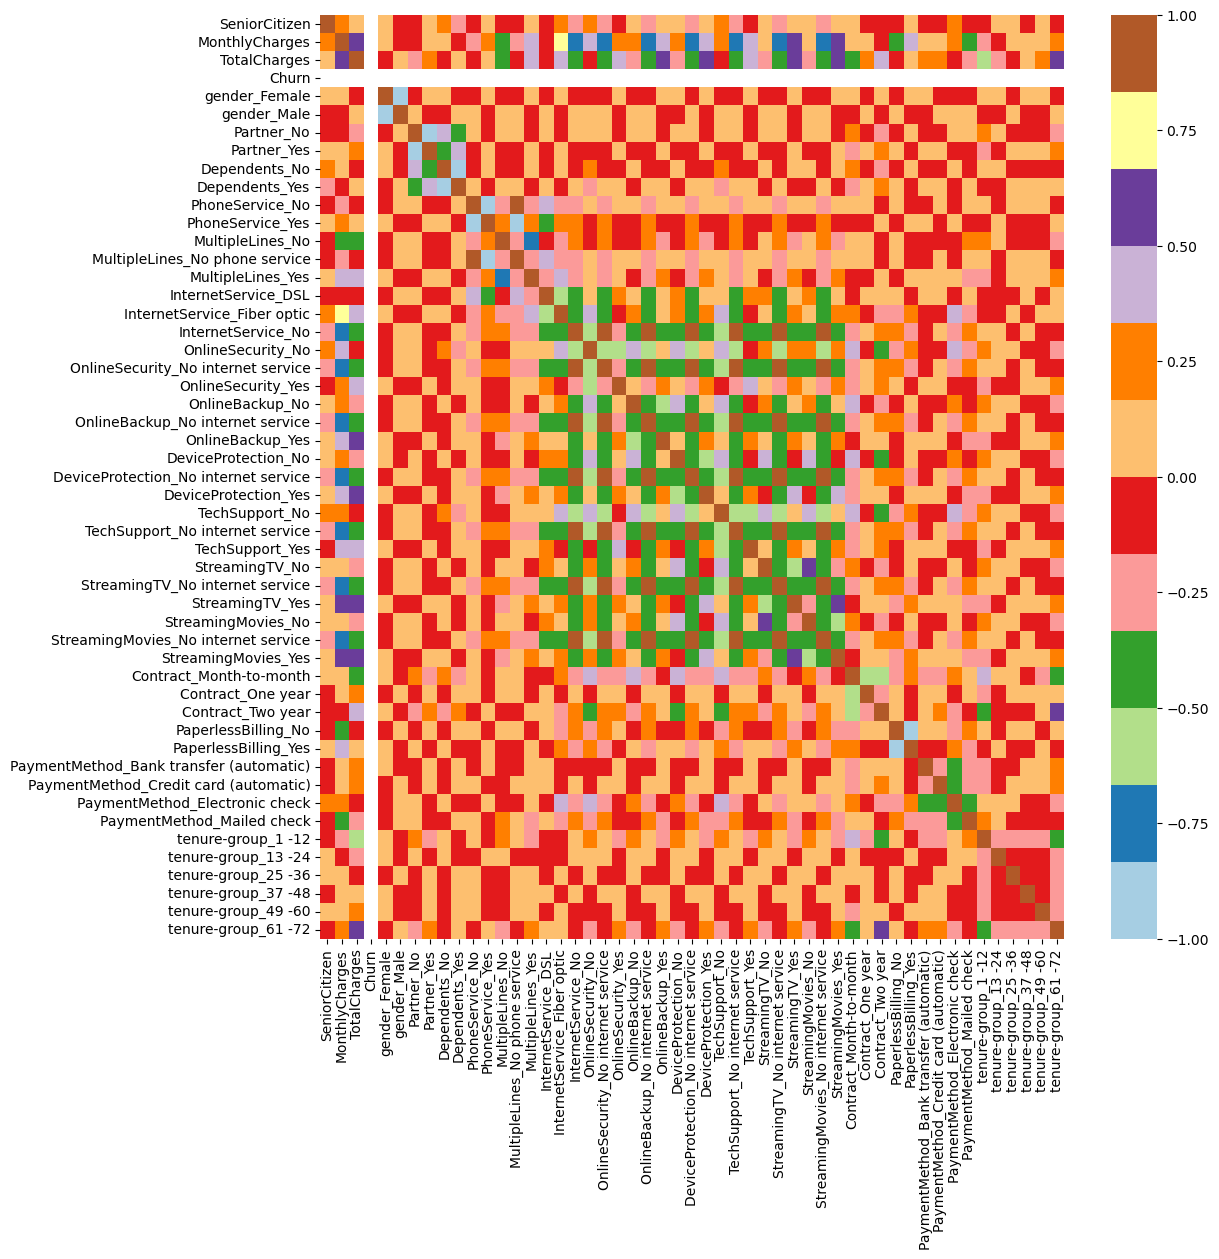

In [73]:
plt.figure(figsize = (12,12))

sns.heatmap(tele_data_dummies.corr(),cmap = "Paired")

In [46]:
new_df0 = tele_data.loc[tele_data["Churn"] == 0]
new_df1 = tele_data.loc[tele_data['Churn'] == 1]


In [47]:
def uniplot(df,col,title,hue = None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams['axes.titlepad'] = 30
    temp = pd.Series(data = hue)
    fig,ax = plt.subplots()
    width = len(df[col].unique())+7+4* len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df,x = col,order = df[col].value_counts().index, hue = hue,palette = 'bright')
    plt.show()



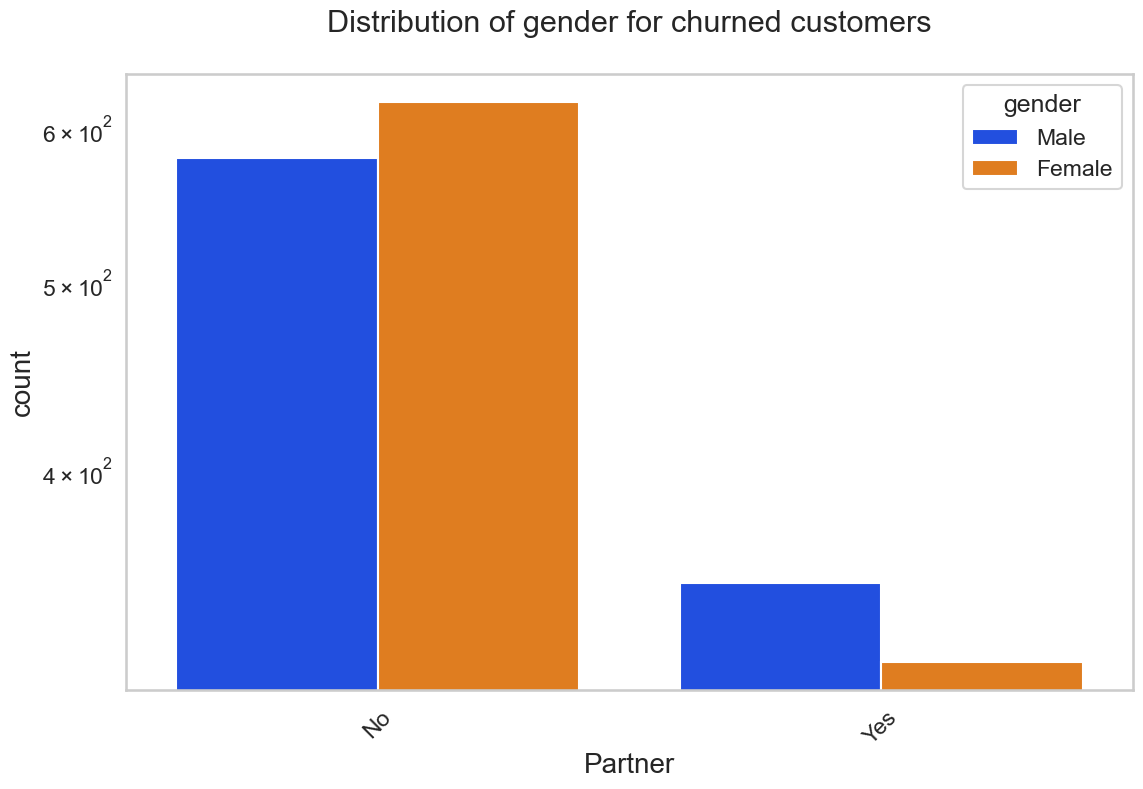

In [48]:
uniplot(new_df1,col = 'Partner',title = 'Distribution of gender for churned customers', hue = 'gender')


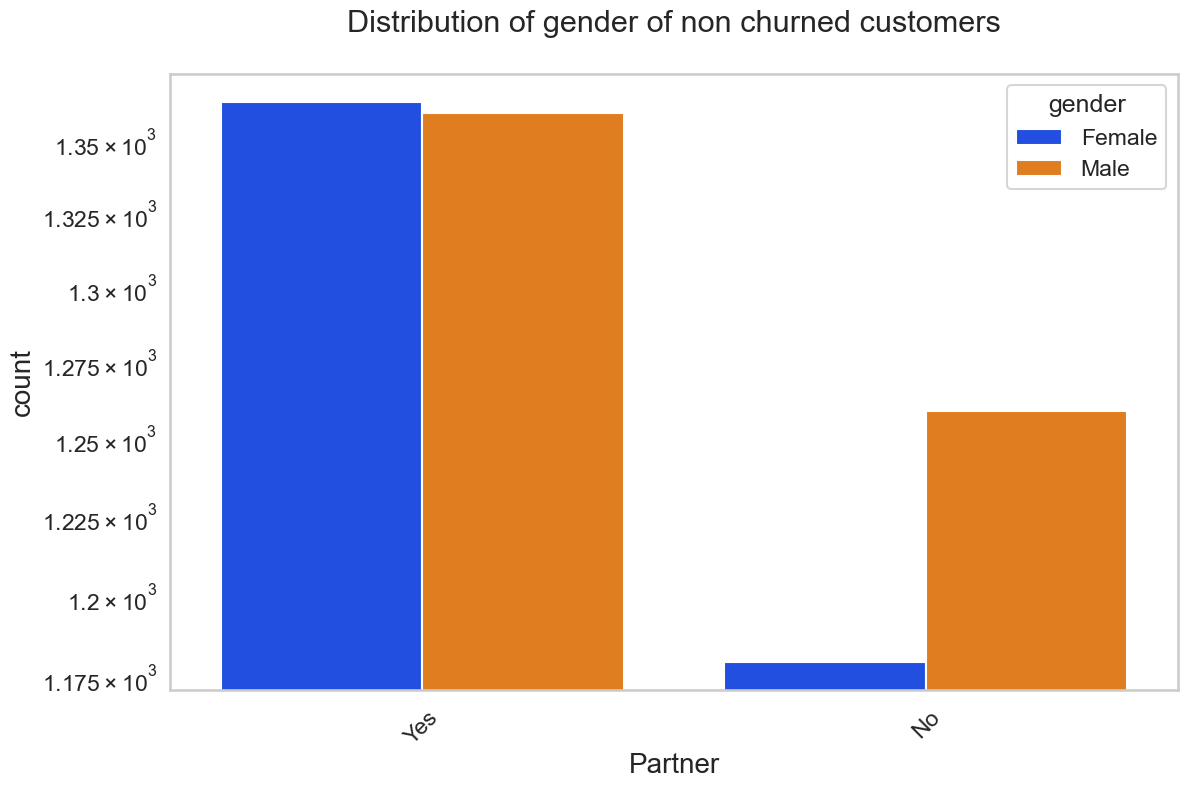

In [49]:
uniplot(new_df0,col = 'Partner',title = "Distribution of gender of non churned customers", hue = 'gender')

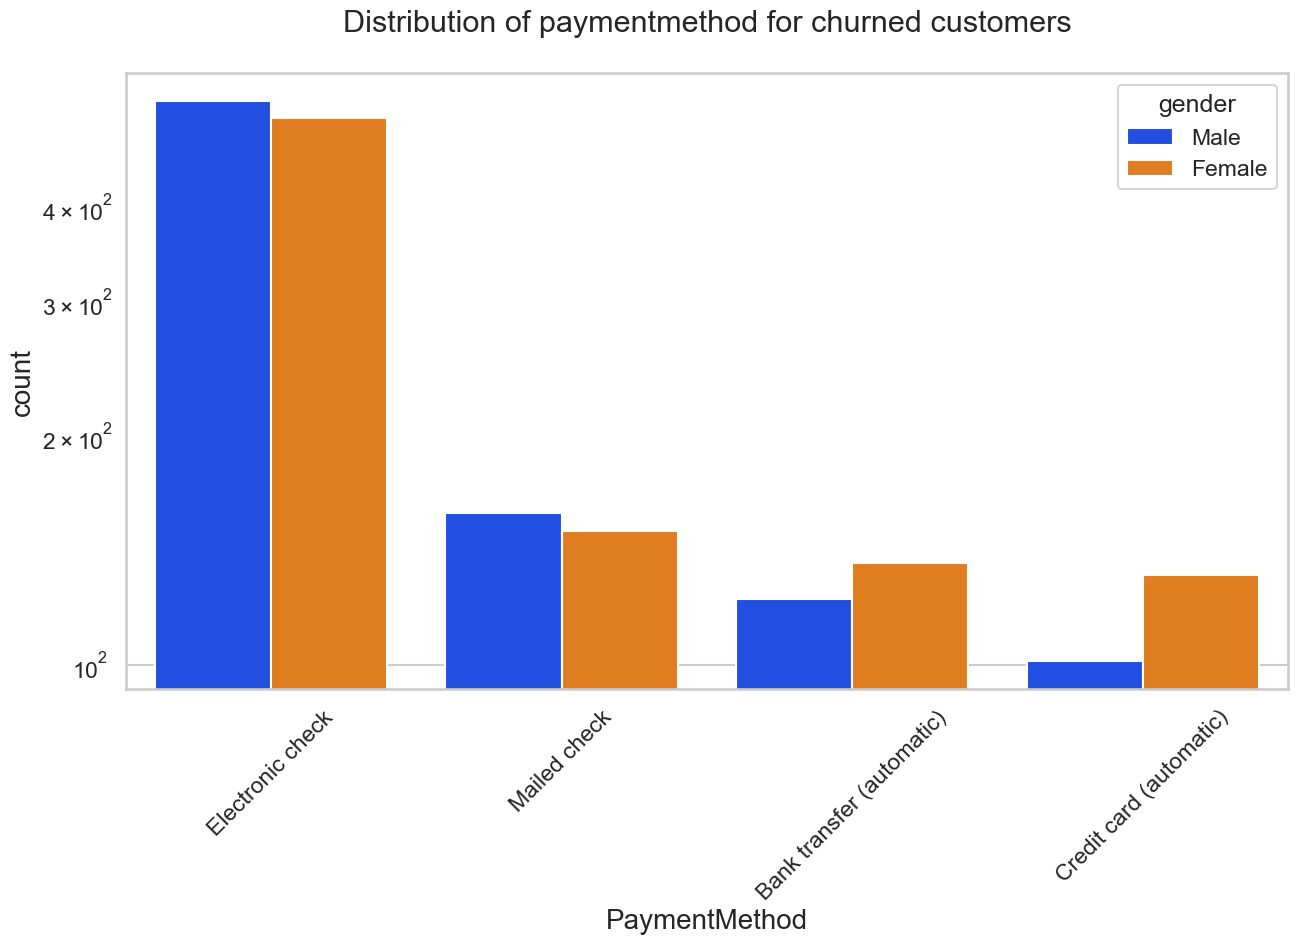

In [50]:
uniplot(new_df1,col = "PaymentMethod",title = 'Distribution of paymentmethod for churned customers', hue = 'gender')

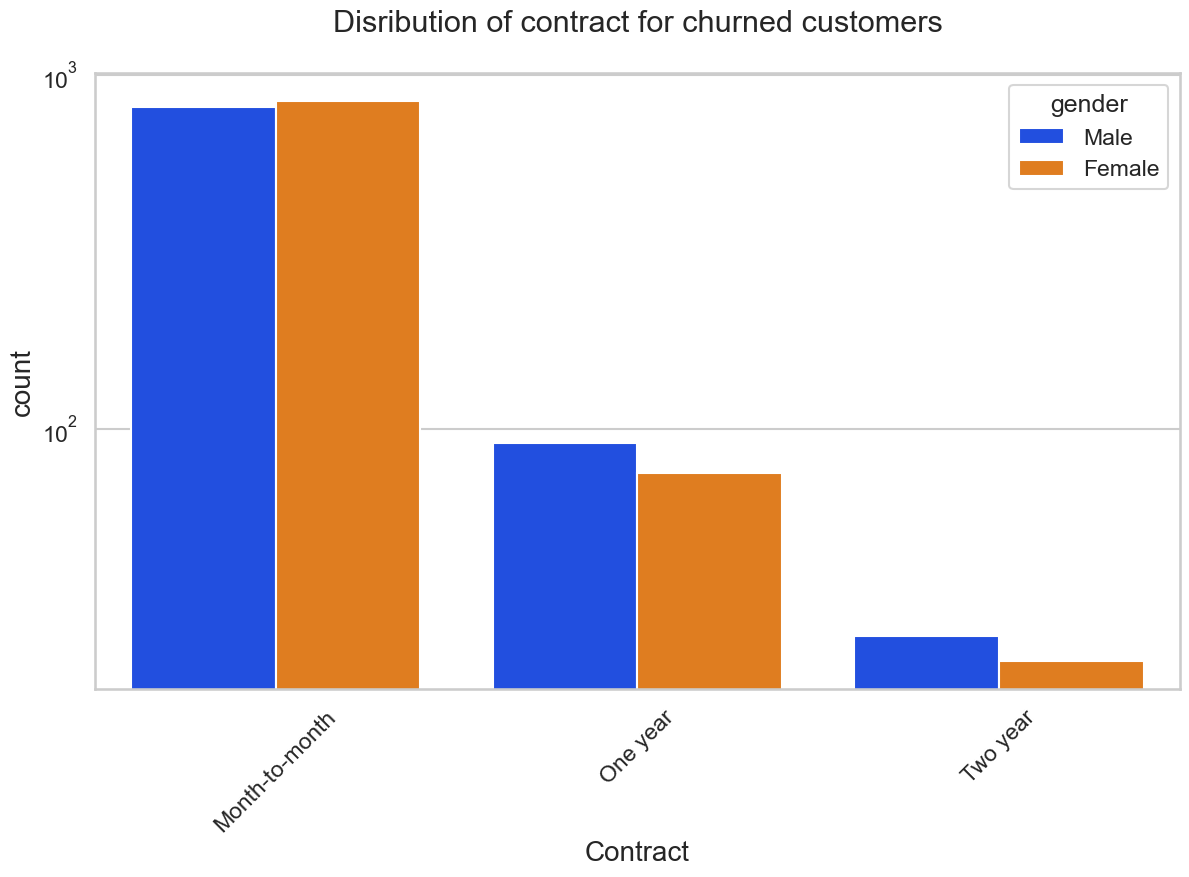

In [51]:
uniplot(new_df1,col = 'Contract',title = 'Disribution of contract for churned customers', hue = 'gender')

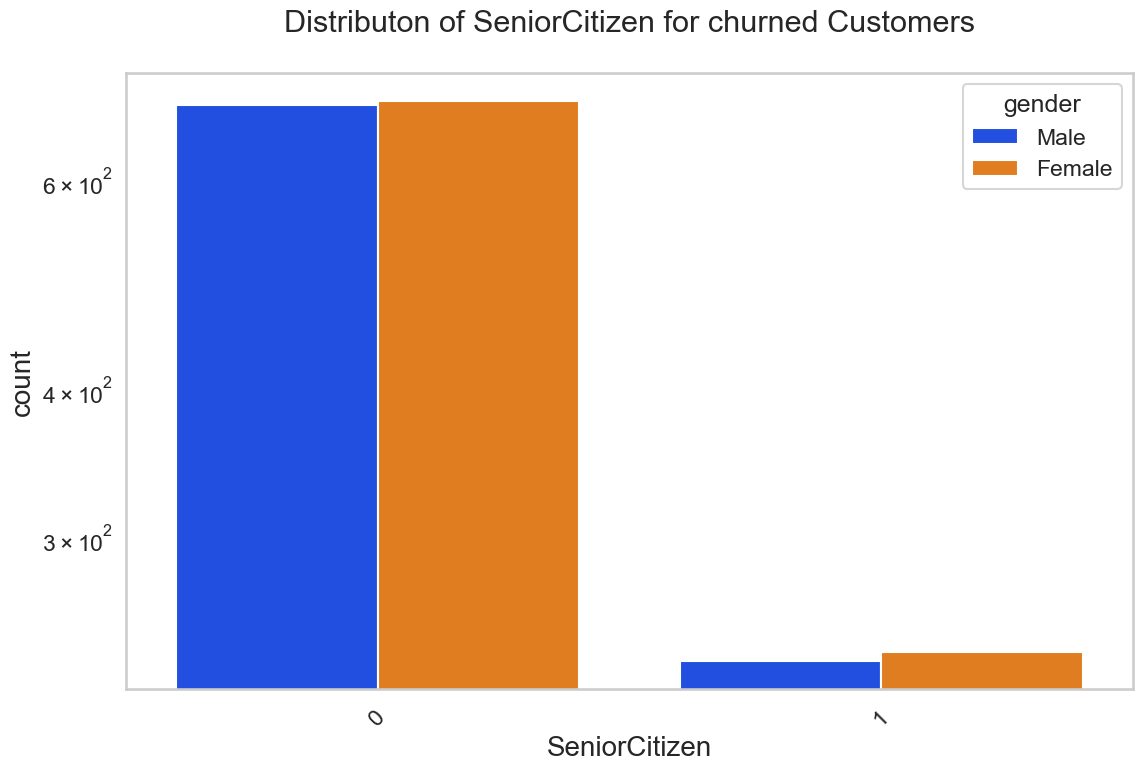

In [52]:
uniplot(new_df1,col = 'SeniorCitizen',title = 'Distributon of SeniorCitizen for churned Customers', hue = 'gender')

In [53]:
tele_data_dummies.to_csv('tele_churn.csv')